In [0]:
import pandas as pd

In [7]:
# create state space and init
states = ['happy', 'sad']
initial = [0.5, 0.5]
state_space = pd.Series(initial, index=states, name='states')
print(state_space)
print('\n', state_space.sum())

# create hidden transition matrix
# probability of changing states given a state
tran_df = pd.DataFrame(columns=states, index=states)
tran_df.loc[states[0]] = [0.7, 0.3]
tran_df.loc[states[1]] = [0.4, 0.6]

print(tran_df)
print(tran_df.sum(axis=1))

# create matrix of observation (emission) probabilities
observations = ['at school', 'in the cinema', 'at the dentist']

emi_df = pd.DataFrame(columns=observations, index=states)
emi_df.loc[states[0]] = [0.3, 0.6, 0.1]
emi_df.loc[states[1]] = [0.4, 0.1, 0.5]

print(emi_df)
print(emi_df.sum(axis=1))

happy    0.5
sad      0.5
Name: states, dtype: float64

 1.0
      happy  sad
happy   0.7  0.3
sad     0.4  0.6
happy    1.0
sad      1.0
dtype: float64
      at school in the cinema at the dentist
happy       0.3           0.6            0.1
sad         0.4           0.1            0.5
happy    1.0
sad      1.0
dtype: float64


In [0]:
def get_edges(df):
    edges = {}
    for col in df.columns:
        for index in df.index:
            edges[(index,col)] = df.loc[index,col]
    return edges
  
def add_edges(G, df):
  for key, value in df.items():
    source, target = key
    G.add_edge(source, target, weight=value, label=value)  
  return G

In [9]:
from pprint import pprint

transition_edges = get_edges(tran_df)
print('Transition:')
pprint(transition_edges)

emission_edges = get_edges(emi_df)
print('Emission:')
pprint(emission_edges)

Transition:
{('happy', 'happy'): 0.7,
 ('happy', 'sad'): 0.3,
 ('sad', 'happy'): 0.4,
 ('sad', 'sad'): 0.6}
Emission:
{('happy', 'at school'): 0.3,
 ('happy', 'at the dentist'): 0.1,
 ('happy', 'in the cinema'): 0.6,
 ('sad', 'at school'): 0.4,
 ('sad', 'at the dentist'): 0.5,
 ('sad', 'in the cinema'): 0.1}


In [10]:
import networkx as nx

G = nx.MultiGraph().to_directed()
G.add_nodes_from(states)
print('Nodes:\n{}\n'.format(G.nodes()))

G = add_edges(G, transition_edges)
G = add_edges(G, emission_edges)
print('Edges:\n{}\n'.format(G.edges(data=True)))


Nodes:
['happy', 'sad']

Edges:
[('happy', 'happy', {'weight': 0.7, 'label': 0.7}), ('happy', 'sad', {'weight': 0.3, 'label': 0.3}), ('happy', 'at school', {'weight': 0.3, 'label': 0.3}), ('happy', 'in the cinema', {'weight': 0.6, 'label': 0.6}), ('happy', 'at the dentist', {'weight': 0.1, 'label': 0.1}), ('sad', 'happy', {'weight': 0.4, 'label': 0.4}), ('sad', 'sad', {'weight': 0.6, 'label': 0.6}), ('sad', 'at school', {'weight': 0.4, 'label': 0.4}), ('sad', 'in the cinema', {'weight': 0.1, 'label': 0.1}), ('sad', 'at the dentist', {'weight': 0.5, 'label': 0.5})]



In [0]:
!apt-get -qq install -y graphviz && pip install -q pydot

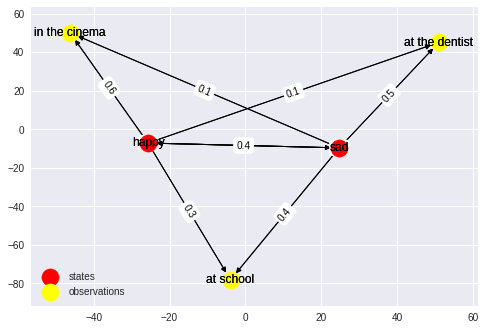

In [12]:
import pydot
import matplotlib.pyplot as plt

pos=nx.drawing.nx_pydot.graphviz_layout(G, prog='neato')

nx.draw_networkx(G,pos=pos,nodelist=states, node_color='red', label='states')
nx.draw_networkx(G,pos=pos,nodelist=observations, node_color='yellow', label='observations')

graph_labels = {(s,t):data['label'] for s,t,data in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=graph_labels)

plt.legend(numpoints = 1)
plt.show()

In [0]:
import numpy as np

#obs_map = {obs:observations.index(obs) for obs in observations}
#obs_map_reversed = {v:k for k, v in obs_map.items()}

obs = np.random.randint(3, size=30)

In [0]:
def viterbi(initial_distr, tran_matrix, emi_matrix, obs):  
    nStates = np.shape(emi_matrix)[0]
    T = np.shape(obs)[0] 
    path = np.zeros(T)
    T1 = np.zeros((nStates, T))
    T2 = np.zeros((nStates, T))
    
    # init T1 and T2 
    T1[:, 0] = initial_distr * emi_matrix[:, obs[0]]
    T2[:, 0] = 0

    # forward step
    for t in range(1, T):
        for s in range(nStates):
            T1[s, t] = np.max(T1[:, t-1] * tran_matrix[:, s]) * emi_matrix[s, obs[t]] 
            T2[s, t] = np.argmax(T1[:, t-1] * tran_matrix[:, s])
    
    # backtrace step
    path[T-1] = np.argmax(T1[:, T-1])

    for t in range(T-2, -1, -1):
        path[t] = T2[int(path[t+1]), t+1]
        
    return path

In [18]:
path = viterbi(initial, tran_df.values, emi_df.values, obs)
print('\nsingle best state path: \n', path)

dict_states={0:'happy', 1:'sad'}
from numpy import copy
newPath = []

for i in range(len(path)):
  for k, v in dict_states.items(): 
    if path[i]==k:
      newPath += [v]
  
print(newPath)


single best state path: 
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1.]
['sad', 'sad', 'sad', 'happy', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'happy', 'sad', 'sad', 'sad', 'happy', 'sad', 'sad', 'sad', 'sad', 'happy', 'sad', 'sad', 'sad', 'sad', 'sad', 'happy', 'sad', 'sad']
